## Lets start:
### Reading in the data:
We use xarray here, but you can also use e.g. iris or even pyaerocom

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

path='../../data_sample/wrf_out.small.h5'
ds = xr.open_dataset(path)

/home/sarambl/anaconda3/envs/general/lib/python3.6/site-packages/distributed/utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


Check how your dataset looks

In [2]:
#lets check how the dataset looks like
ds

<xarray.Dataset>
Dimensions:  (XTIME: 1449, bottom_top: 10, south_north: 17, west_east: 23)
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
  * XTIME    (XTIME) datetime64[ns] 2017-12-02 ... 2018-06-01
Dimensions without coordinates: bottom_top, south_north, west_east
Data variables:
    P        (XTIME, bottom_top, south_north, west_east) float32 ...
    V        (XTIME, bottom_top, south_north, west_east) float32 ...
    U        (XTIME, bottom_top, south_north, west_east) float32 ...
    T        (XTIME, bottom_top, south_north, west_east) float32 ...

In [10]:
#lets define some constants for the variable names so that calling them is easier.
BT  = 'bottom_top'
SN  = 'south_north'
WE  = 'west_east'
time  = 'XTIME'
lat = 'XLAT'
lon = 'XLONG'
P, V, U, T = 'P','V','U','T'

#this is potential temperature in C
T_C = 'T_C'

In [11]:
# lets process potential temperature into C
ds[T_C] = ds[T] + 300 - 273
ds[T_C] = ds[T_C].assign_attrs({'units': 'C'})

## Plotting

### Statistics:

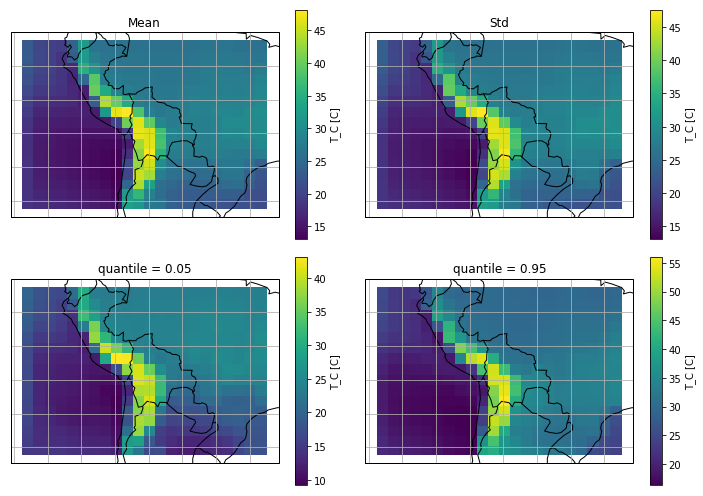

In [52]:
import cartopy.crs as ccrs
fig, axsm = plt.subplots(2,2, figsize=[10,7], subplot_kw={'projection':ccrs.PlateCarree()})
axs = axsm.flatten()
_ds = ds[T_C][{BT:0}]
_ds.mean(time, keep_attrs=True).plot(x=lon, y=lat,ax=axs[0], transform=ccrs.PlateCarree(), robust=True)
axs[0].set_title('Mean')
_ds.std(time, keep_attrs=True).plot(x=lon, y=lat,ax=axs[1], transform=ccrs.PlateCarree())#, robust=True)
axs[1].set_title('Std')
_ds.quantile(0.05, dim=time, keep_attrs=True).plot(x=lon, y=lat,ax=axs[2], transform=ccrs.PlateCarree())#, robust=True)
_ds.quantile(0.95, dim=time, keep_attrs=True).plot(x=lon, y=lat,ax=axs[3], transform=ccrs.PlateCarree())#, robust=True)
for ax in axs:
    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
plt.tight_layout()

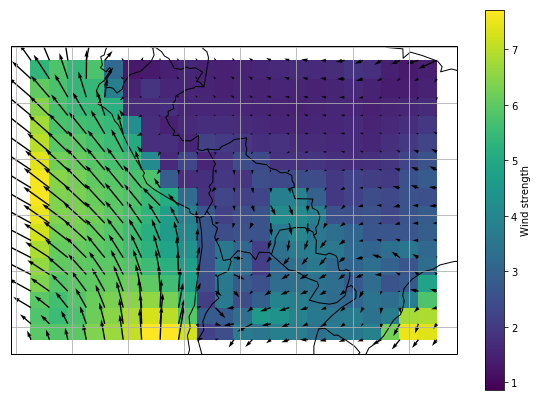

In [79]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(1, figsize=[10,7], subplot_kw={'projection':ccrs.PlateCarree()})
#axs = axsm.flatten()
WS = 'Wind strength'
ds[WS] = np.sqrt(ds[U]**2+ ds[V]**2)
ds[WS].attrs['units']='m/s'
ds[WS].attrs['name']='Wind strength'

_ds = ds[[U,V, WS]][{BT:0}].mean(XT)
_ds[WS].plot(x=XLO,y=XLA, transform=ccrs.PlateCarree())
ax.quiver(_ds[XLO], _ds[XLA], _ds['U'],_ds['V'], transform=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines()
ax.add_feature(cy.feature.BORDERS);
#plt.tight_layout()

### Tired of making plots:

In [141]:
def sp_map(*nrs, projection = ccrs.PlateCarree(), **kwargs):
    return plt.subplots(*nrs, subplot_kw={'projection':projection}, **kwargs)
    
def add_map_features(ax):
    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);



/home/sarambl/anaconda3/envs/general/lib/python3.6/site-packages/xarray/core/common.py:608: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


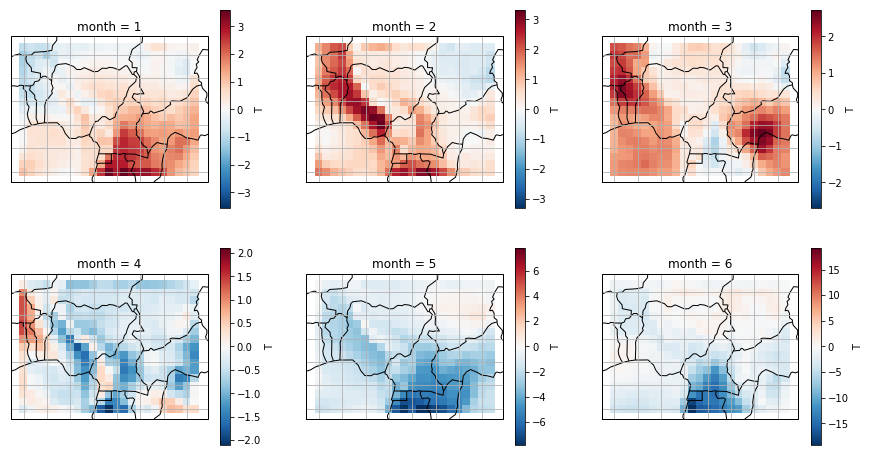

In [142]:
fig, axs = sp_map(2,3, figsize=[15,8])

T_mm = ds[T][{BT:0}].groupby('XTIME.month').mean(XT)
T_mean = ds[T][{BT:0}].mean(XT)
T_dev = T_mm- T_mean
T_mm.sel(month=1)
for mo, ax in zip(T_mm['month'], axs.flatten()):
    T_dev.sel(month=mo) .plot(ax=ax, transform=ccrs.PlateCarree())
    add_map_features(ax)
